# Лабораторная работа №1

## Задание 1-2
#### Загрузка данных

In [43]:
import pandas as pd

df = pd.read_csv('Datayeast.dat', header=None)
df.columns =['Mcg', 'Gvh', 'Alm', 'Mit', 'Erl', 'Pox', 'Vac', 'Nuc', 'Class']
df

,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,Class
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,negative
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,negative
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,negative
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,positive
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,negative
...,...,...,...,...,...,...,...,...,...
1479,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,negative
1480,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,positive
1481,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,negative
1482,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,positive


## Задание 3
#### Стандартизация

In [44]:
from sklearn import preprocessing
import numpy as np

In [45]:
Columns = ['Mcg', 'Gvh', 'Alm', 'Mit', 'Erl', 'Pox', 'Vac', 'Nuc']
# Заменяем negative на 0, positive на 1
df['Class'] = df['Class'].replace(['negative', 'positive'],[0, 1], regex = True)

df.dropna()

scaler_std = preprocessing.StandardScaler()
x = scaler_std.fit_transform(df[Columns])
df[Columns] = x
df

,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,Class
0,0.581981,0.888481,-0.346645,-0.957203,-0.09759,-0.099131,-0.344175,-0.527919,0
1,-0.510891,1.372811,-0.231226,0.064312,-0.09759,-0.099131,0.521219,-0.527919,0
2,1.019130,0.969203,-0.115808,-0.811272,-0.09759,-0.099131,0.521219,-0.527919,0
3,0.581981,-0.483786,0.807542,-0.957203,-0.09759,-0.099131,0.694298,-0.527919,1
4,-0.583749,-0.483786,-0.231226,2.034375,-0.09759,-0.099131,-0.344175,-0.527919,0
...,...,...,...,...,...,...,...,...,...
1479,2.257718,0.969203,-0.808320,-0.665341,-0.09759,-0.099131,0.521219,-0.527919,0
1480,-0.219458,-0.564507,1.269217,1.012861,-0.09759,-0.099131,-0.344175,1.820499,1
1481,1.237705,0.565595,-1.616251,-0.519411,-0.09759,-0.099131,1.040456,-0.527919,0
1482,-0.510891,-0.806672,1.153799,-0.738307,-0.09759,-0.099131,0.521219,1.069005,1


## Задание 4
#### Делим на обучающую и тестовую выборки (7/3)
###### *Валидационная входит в обучающую и составляет 2 части

In [46]:
col = ['index'] + Columns + ['Class']

In [47]:
from sklearn.model_selection import train_test_split

y = df['Class']
train_table, test_table = train_test_split(df, train_size = 0.7, stratify = y)
train_class, test_class = train_test_split(y, train_size = 0.7, stratify = y)

train_table = train_table.reset_index()
test_table = test_table.reset_index()
train_class = train_class
test_class = test_class

df_test_table = pd.DataFrame(test_table, columns = col)
df_train_table = pd.DataFrame(train_table, columns = col)

df_test_class = pd.DataFrame(test_class, columns = ['Class'])
df_train_class = pd.DataFrame(train_class, columns = ['Class'])

print('train_table:')
df_train_table
print(df_test_class.value_counts())
print(df_test_class.value_counts())

train_table:
Class
0        317
1        129
dtype: int64
Class
0        317
1        129
dtype: int64


In [48]:
print('test_table:')
df_test_table

test_table:


,index,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,Class
0,357,-1.385188,-1.533166,0.461286,-0.592376,-0.09759,-0.099131,0.348141,0.129638,1
1,1016,-0.802323,1.211368,0.807542,-0.519411,-0.09759,-0.099131,-1.036491,-0.246109,0
2,1417,-0.875181,-1.048837,-1.616251,-0.884237,-0.09759,-0.099131,0.694298,-0.527919,0
3,1222,0.363407,-0.968115,0.230449,-0.738307,-0.09759,-0.099131,-0.171096,3.417423,1
4,217,-0.219458,-0.322342,1.038380,1.669549,-0.09759,-0.099131,1.040456,-0.527919,0
...,...,...,...,...,...,...,...,...,...,...
441,898,0.217691,-0.322342,0.461286,0.793965,-0.09759,-0.099131,0.175062,0.223574,1
442,1123,-0.948039,-0.806672,-1.385414,-0.592376,-0.09759,-0.099131,0.175062,-0.527919,0
443,1220,-0.146600,-2.663269,-1.500833,0.502104,-0.09759,-0.099131,-1.036491,0.787195,1
444,579,2.184860,2.502913,0.576705,0.648034,-0.09759,-0.099131,-1.382649,-0.527919,0


## Задание 5
#### Деревья решений

In [61]:
import matplotlib.pyplot as plt
from sklearn import tree

from sklearn.metrics import roc_auc_score

In [62]:
def MakingTree(crit, alpha):
    clf = tree.DecisionTreeClassifier(criterion = crit, ccp_alpha = alpha)
    clf.fit(train_table[Columns], train_table[['Class']])
    

    tree.plot_tree(clf,filled = True, rounded = True)
    plt.savefig('tree.pdf') ##для сохранение в пдф
    plt.show
    
    # scores = clf.decision_function(test_table)
    # fpr, tpr, thresholds = metrics.roc_curve(test_class, scores)
    
    # Классифицируем тестовую выборку и находим процент совпадения
    print(clf.score(test_table[Columns], test_table[['Class']]))
    roc_auc_score(test_table[['Class']], clf.predict(test_table[Columns]), average = 'macro')
    
    # res = clf.predict(test_table[Columns])
    # print("Accuracy = ", accuracy_score(test_class, res))
    # print("Precision = ", precision_score(test_class, res, average='weighted', zero_division=1))
    # print("Recall = ", recall_score(test_class, res, average='weighted'))

## По Джинни 

0.7623318385650224


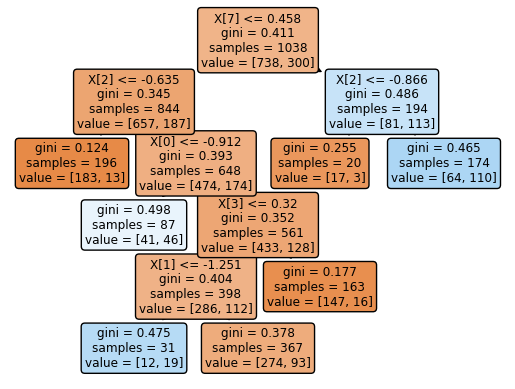

In [63]:
MakingTree('gini', 0.005)

0.7286995515695067


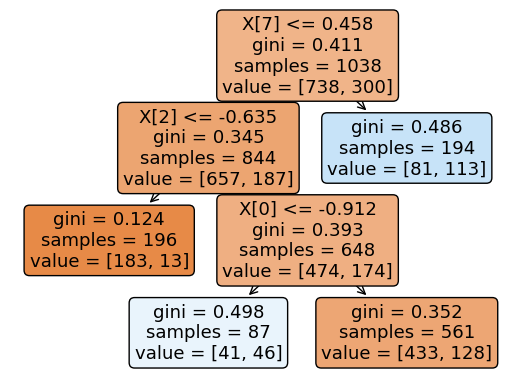

In [64]:
MakingTree('gini', 0.01)

0.7488789237668162
Выбираем!


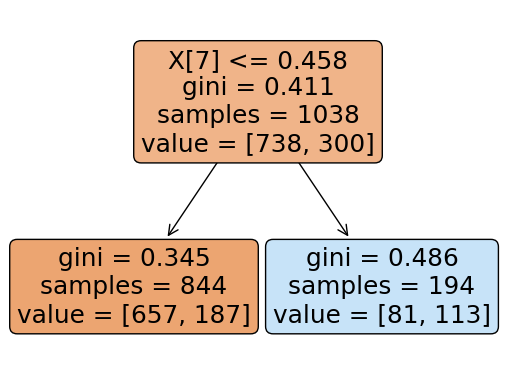

In [65]:
MakingTree('gini', 0.014)
print("Выбираем!")

0.7488789237668162


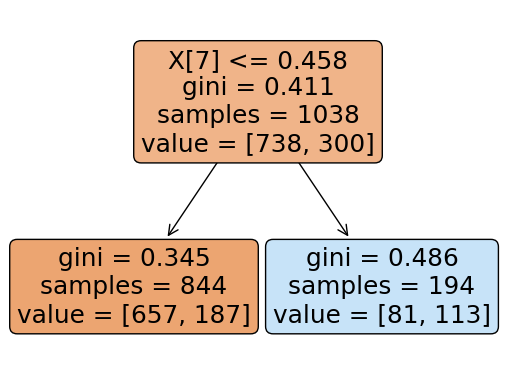

In [66]:
MakingTree('gini', 0.02)

0.7488789237668162


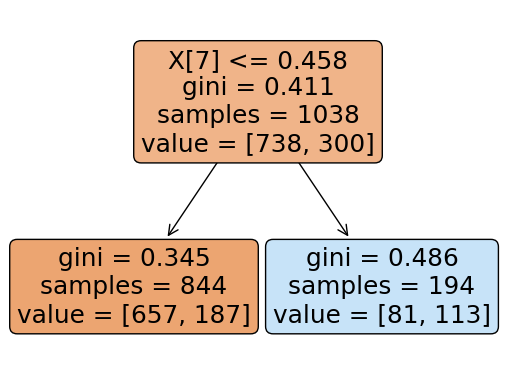

In [67]:
MakingTree('gini', 0.03)

0.7107623318385651


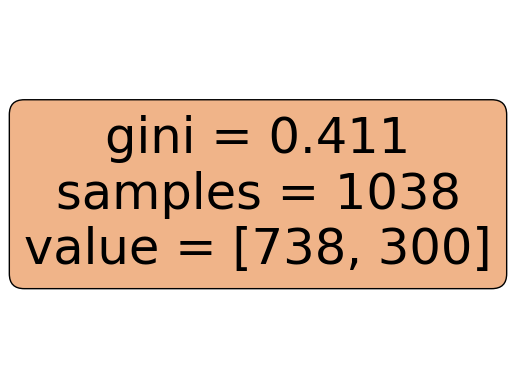

In [68]:
MakingTree('gini', 0.2)

0.7107623318385651


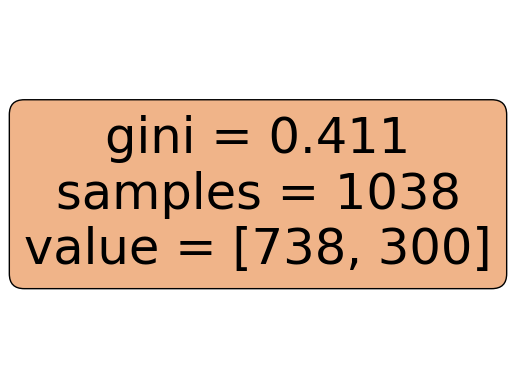

In [69]:
MakingTree('gini', 0.8)

## По энтропии

0.7668161434977578


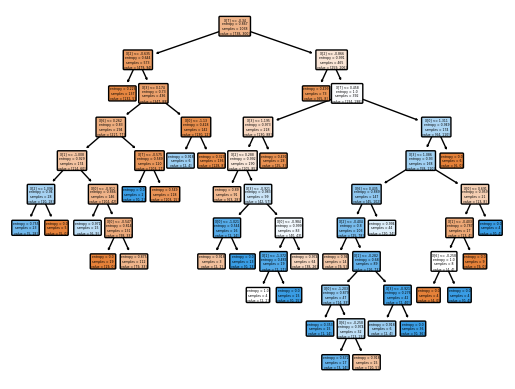

In [70]:
MakingTree('entropy', 0.005)

0.773542600896861


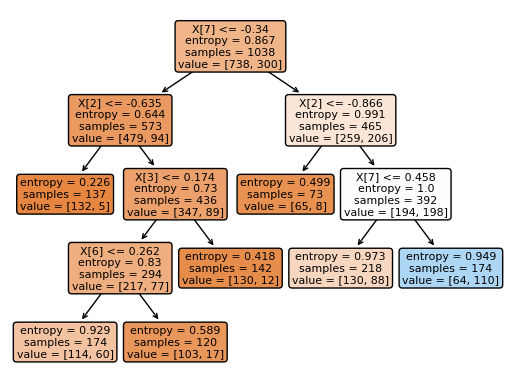

In [71]:
MakingTree('entropy', 0.01)

0.742152466367713


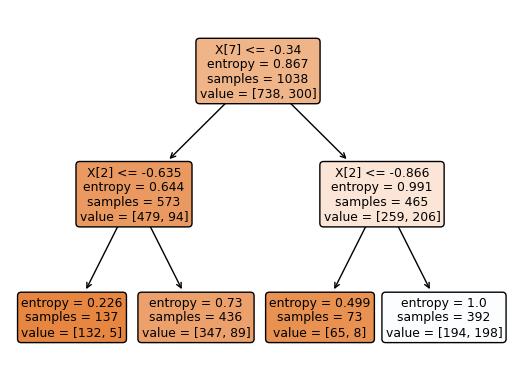

In [72]:
MakingTree('entropy', 0.015)

0.742152466367713


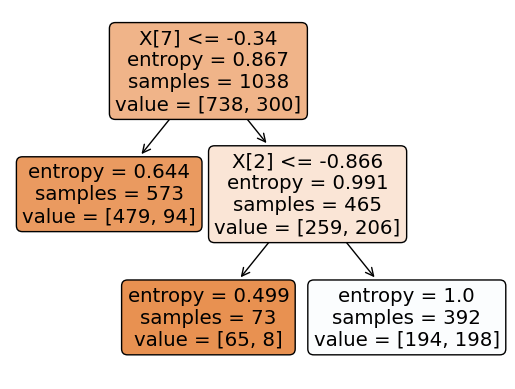

In [73]:
MakingTree('entropy', 0.02)

0.742152466367713


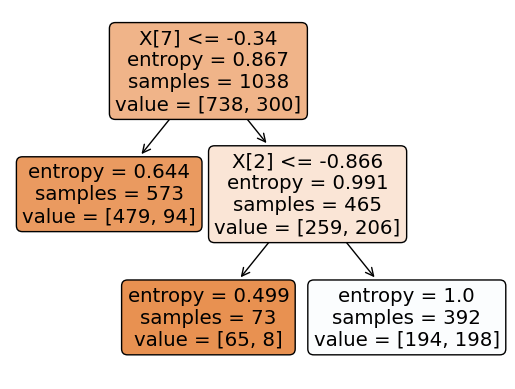

In [74]:
MakingTree('entropy', 0.025)

0.742152466367713


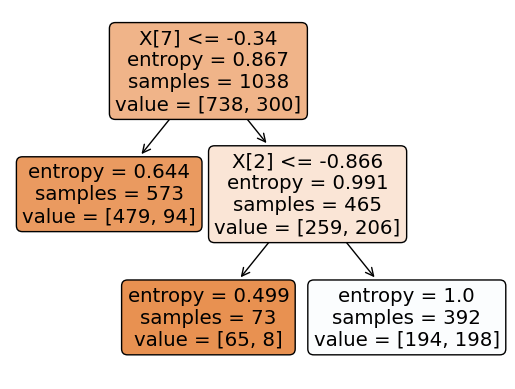

In [75]:
MakingTree('entropy', 0.03)

0.7107623318385651


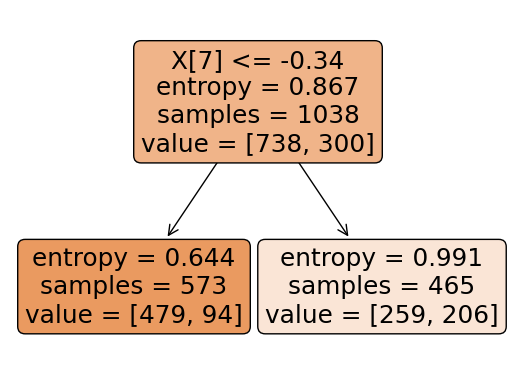

In [76]:
MakingTree('entropy', 0.035)

0.7107623318385651
Выбираем!


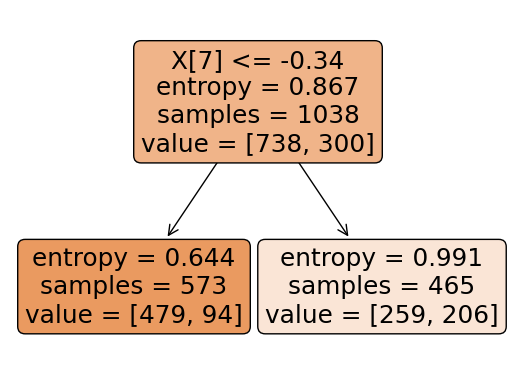

In [77]:
MakingTree('entropy', 0.037)
print("Выбираем!")

0.4479166666666667
Accuracy =  0.4354166666666667
Precision =  0.7541710069444444
Recall =  0.4354166666666667


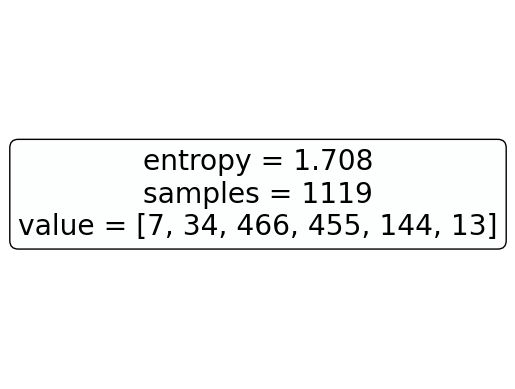

In [95]:
MakingTree('entropy', 0.2)

0.4479166666666667
Accuracy =  0.4354166666666667
Precision =  0.7541710069444444
Recall =  0.4354166666666667


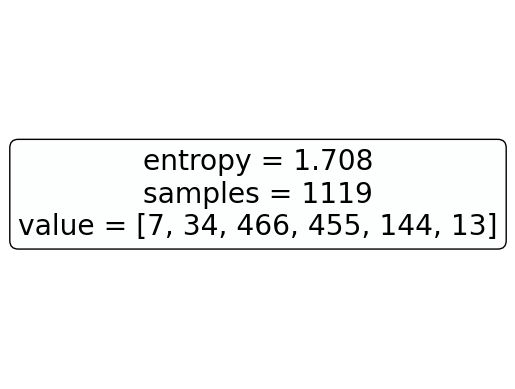

In [96]:
MakingTree('entropy', 0.8)

#### Для энтропии наилучшим дерево является при альфа = 0.037 с 56,88% со следующими параметрами эффективности:  
##### Accuracy =  0.4083
##### Precision =  0.4974
##### Recall =  0.4083

#### Для коэффициента Джинни наилучшим дерево является при альфа = 0.014 с 56,67% со следующими параметрами эффективности: 
##### Accuracy =  0.4292
##### Precision =  0.5168
##### Recall =  0.4292

# Задание 6
#### SVM-классификатор

In [ ]:
gammas = ['scale', 'auto', 1, 10, 0.1, 20, 0.01]
coef0s = [0, 1, 2, 5, 10, 0.1, 0.01]
degrees = [2, 3, 4, 5]
Cs = [0.001, 0.01, 0.1, 0.5, 1, 2, 10, 20]

In [ ]:
#Не запускать!!!
from sklearn import svm


for krl in ['linear', 'poly', 'rbf', 'sigmoid']:
    best = [0]
    for gamma in gammas:
        for coef0 in coef0s:
            for degree in degrees:
                for C in Cs:
                    clf = svm.SVC(kernel = krl, gamma = gamma, coef0 = coef0,
                            degree = degree, C = C)
                    clf.fit(train_table[Columns], 
                            train_table['Class'])
                    res = clf.predict(test_table[Columns])
                    score = clf.score(test_table[Columns],
                                      test_table[['Class']])
                    if score > best[0]:
                        best = [score, gamma, coef0, degree, C]
                        
    print(krl, best)

In [9]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


gammas = ['scale', 'auto', 1, 10, 0.1, 20, 0.01]
coef0s = [0, 1, 2, 5, 10, 0.1, 0.01]
degrees = [2, 3, 4, 5]
Cs = [0.001, 0.01, 0.1, 0.5, 1, 2, 10, 20]

krl ='linear'
best = [0]
for gamma in gammas:
    for coef0 in coef0s:
        for degree in degrees:
            for C in Cs:
                clf = svm.SVC(kernel = krl, gamma = gamma, coef0 = coef0,
                              degree = degree, C = C)
                clf.fit(train_table[Columns], 
                        train_table['Class'])
                res = clf.predict(test_table[Columns])
                score = clf.score(test_table[Columns],
                                  test_table[['Class']])
                if score > best[0]:
                    best = [score, gamma, coef0, degree, C]
                        
print(krl, best)
clf = svm.SVC(kernel = krl, gamma = best[1], coef0 = best[2], degree = best[3], C = best[4])
clf.fit(train_table[Columns], train_table['Class'])
res = clf.predict(test_table[Columns])

print("Accuracy = ", accuracy_score(test_class, res))
print("Precision = ", precision_score(test_class, res, average='weighted', zero_division=1))
print("Recall = ", recall_score(test_class, res, average='weighted'))

linear [0.5958333333333333, 'scale', 0, 2, 0.1]
Accuracy =  0.425
Precision =  0.5274945175438597
Recall =  0.425


In [10]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


gammas = ['scale', 'auto', 1, 10, 0.1, 20, 0.01]
coef0s = [0, 1, 2, 5, 10, 0.1, 0.01]
degrees = [2, 3, 4, 5]
Cs = [0.001, 0.01, 0.1, 0.5, 1, 2, 10, 20]

krl ='sigmoid'
best = [0]
for gamma in gammas:
    for coef0 in coef0s:
        for degree in degrees:
            for C in Cs:
                clf = svm.SVC(kernel = krl, gamma = gamma, coef0 = coef0,
                              degree = degree, C = C)
                clf.fit(train_table[Columns], 
                        train_table['Class'])
                res = clf.predict(test_table[Columns])
                score = clf.score(test_table[Columns],
                                  test_table[['Class']])
                if score > best[0]:
                    best = [score, gamma, coef0, degree, C]
                        
print(krl, best)
clf = svm.SVC(kernel = krl, gamma = best[1], coef0 = best[2], degree = best[3], C = best[4])
clf.fit(train_table[Columns], train_table['Class'])
res = clf.predict(test_table[Columns])

print("Accuracy = ", accuracy_score(test_class, res))
print("Precision = ", precision_score(test_class, res, average='weighted', zero_division=1))
print("Recall = ", recall_score(test_class, res, average='weighted'))

sigmoid [0.5979166666666667, 0.01, 0, 2, 2]
Accuracy =  0.41875
Precision =  0.5221250694637399
Recall =  0.41875


In [11]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_class, res))

[[  0   0   4   1   0   0]
 [  0   0   9   6   0   0]
 [  0   0 101 105   0   0]
 [  0   0  89 100   0   0]
 [  0   0  30  30   0   0]
 [  0   0   3   2   0   0]]


In [12]:
df['Class'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

### Наилучшие значения параметров:
####    linear [0.5958333, 'scale', 0, 2, 0.01]:
######      Accuracy =  0.425
######      Precision =  0.527
######      Recall =  0.425
####    poly -
####    rbf -
####    sigmoid [0.5979166, 0.01, 0, 2, 2]
######      Accuracy =  0.4188
######      Precision =  0.5221
######      Recall =  0.4188

# Задание 7
#### Выбираем наилучшее
###### Тестовой становится валидационная выборка, составляющая 2 части из 7 всего

In [13]:
from sklearn.model_selection import train_test_split


train_table, test_table = train_test_split(df_train_table, train_size = 5/7)
train_class, test_class = train_test_split(train_class, train_size = 5/7)

train_table = train_table.reset_index()
test_table = test_table.reset_index()

df_test_table = pd.DataFrame(test_table, columns = col)
df_train_table = pd.DataFrame(train_table, columns = col)

print('train_table:')
df_train_table

train_table:


,index,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Class
0,602,-0.356000,1.716051,-1.391472,0.043416,-0.137438,-0.944346,-0.987312,0.399270,-0.072005,-0.815259,-1.054113,5
1,250,1.425044,-1.160984,0.867948,-0.666062,-0.520005,0.011961,-0.287906,0.929284,-0.590348,0.719081,-0.397043,6
2,716,-0.183641,-0.546472,0.457144,-0.169427,-0.264960,-0.561823,0.046593,0.452272,0.187166,-1.169337,-0.960246,5
3,920,0.735607,-0.658202,0.508495,-0.169427,0.075099,-0.561823,-0.713631,0.590075,-0.460762,-0.579207,0.072294,5
4,235,-0.643266,0.570823,-1.391472,-0.453218,0.202621,-0.179300,-0.257497,0.001760,0.381544,-0.461180,-1.335715,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,722,-0.413454,-0.602337,-0.980669,0.114364,-0.073677,-0.083669,0.046593,0.028261,-0.655141,-0.402167,-0.397043,5
795,476,0.563248,-1.440308,0.713897,-0.382271,0.075099,-0.944346,-0.926494,0.664277,-0.201591,0.246977,-0.678644,5
796,881,-0.413454,1.045674,-1.391472,-0.311323,-0.413736,1.350792,-0.348724,-0.750859,1.094265,-0.048089,0.917099,6
797,182,-0.643266,1.129471,-1.288771,-0.027532,-0.243707,0.011961,-0.135861,0.240266,0.835093,-0.815259,-1.054113,5


In [14]:
print('test_table:')
df_test_table

test_table:


,index,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Class
0,567,0.218530,0.961877,-0.159061,-0.027532,2.944352,-1.039977,-0.956903,1.247292,0.057580,-0.343154,-1.335715,6
1,437,1.597403,-0.434742,2.357111,0.469103,-0.456244,-0.944346,-0.744040,0.982285,-0.914312,0.010924,0.729364,6
2,1045,-0.815625,-0.490607,-1.391472,-0.807957,-0.371229,1.542054,-0.257497,-1.254372,0.057580,-0.461180,0.917099,6
3,682,0.103624,-0.378878,0.200392,-0.204901,-0.201199,1.542054,0.350683,0.664277,0.122373,-0.697233,-0.584777,5
4,1271,-0.585813,-0.490607,-0.364463,-0.666062,-0.817557,0.777007,0.533136,-1.720784,0.446337,-0.520193,1.198701,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,382,-0.011282,-1.496173,0.765247,-0.382271,-0.158692,-0.466193,-0.591995,0.346269,-0.655141,0.837107,-0.960246,6
316,649,-0.930531,-0.602337,-0.005010,4.300284,-0.413736,0.777007,3.087490,-1.031767,-0.979104,-0.520193,0.823232,6
317,651,0.850513,1.967442,-0.107711,-0.027532,0.351398,1.828946,3.300352,2.254318,0.640715,0.069937,0.729364,5
318,1365,-0.298547,-0.155419,-0.929318,-0.240375,0.585188,-0.561823,-0.135861,0.187265,-0.849519,-0.225128,-0.866379,5


### Деревья принятия решений
#### 1) По коэф. Джини

0.525
Accuracy =  0.390625
Precision =  0.7608100711548987
Recall =  0.19545295149035652


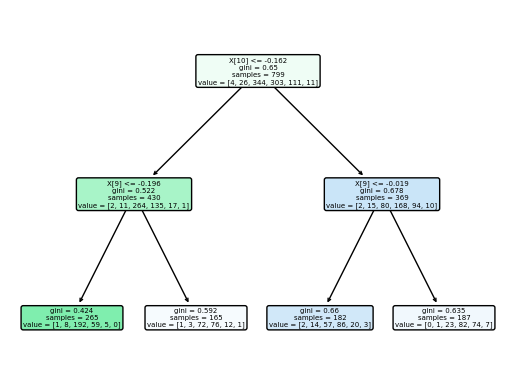

In [24]:
clf = tree.DecisionTreeClassifier(criterion = 'gini', ccp_alpha = 0.014)
clf.fit(train_table[Columns], train_table[['Class']])
    
tree.plot_tree(clf,filled = True, rounded = True)
plt.savefig('tree.pdf') ##для сохранение в пдф
plt.show
    
# Классифицируем тестовую выборку и находим процент совпадения
print(clf.score(test_table[Columns], test_table[['Class']]))
    
res = clf.predict(test_table[Columns])
print("Accuracy = ", accuracy_score(test_class, res))
print("Precision = ", precision_score(test_class, res, average='macro', zero_division=1))
print("Recall = ", recall_score(test_class, res, average='macro'))

#### 2) По энтропии

0.49375
Accuracy =  0.390625
Precision =  0.7667067535919995
Recall =  0.20302746931618937


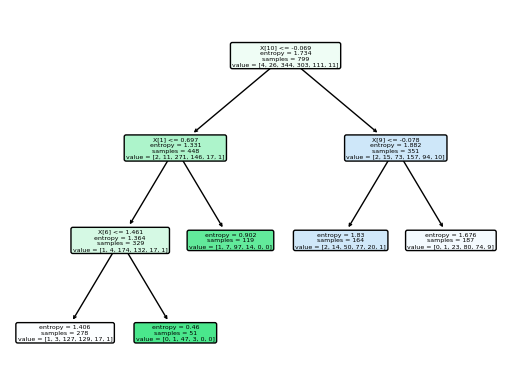

In [25]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.037) 
clf.fit(train_table[Columns], train_table[['Class']])
    
tree.plot_tree(clf,filled = True, rounded = True)
plt.savefig('tree.pdf') ##для сохранение в пдф
plt.show
    
# Классифицируем тестовую выборку и находим процент совпадения
print(clf.score(test_table[Columns], test_table[['Class']]))
    
res = clf.predict(test_table[Columns])
print("Accuracy = ", accuracy_score(test_class, res))
print("Precision = ", precision_score(test_class, res, average='macro', zero_division=1))
print("Recall = ", recall_score(test_class, res, average='macro'))

### SVM-классификаторы

In [26]:
clf = svm.SVC(kernel = 'linear', gamma ='scale', coef0 = 0, degree = 2, C = 0.1)
clf.fit(train_table[Columns], train_table['Class'])
res = clf.predict(test_table[Columns])

print(clf.score(test_table[Columns], test_table[['Class']]))    
print("Accuracy = ", accuracy_score(test_class, res))
print("Precision = ", precision_score(test_class, res, average='macro', zero_division=1))
print("Recall = ", recall_score(test_class, res, average='macro'))

0.578125
Accuracy =  0.396875
Precision =  0.7571969696969697
Recall =  0.19126826417299828


In [28]:
clf = svm.SVC(kernel = 'sigmoid', gamma = 0.01, coef0 = 0, degree = 2, C = 2)
clf.fit(train_table[Columns], train_table['Class'])
res = clf.predict(test_table[Columns])

print(clf.score(test_table[Columns], test_table[['Class']]))    
print("Accuracy = ", accuracy_score(test_class, res))
print("Precision = ", precision_score(test_class, res, average='macro', zero_division=1))
print("Recall = ", recall_score(test_class, res, average='macro'))

0.584375
Accuracy =  0.403125
Precision =  0.7589645407043994
Recall =  0.193395675043834


### Таким образом, наилучшим классификатором оказался сигмоид(gamma = 0.01, coef0 = 0, degree = 2, C = 2) с процентом совпадения 58,44%